In [11]:
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
plt.rcParams['font.sans-serif'] = ['SimHei']


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 说明---三个有效秩

为了更好的反应不同的scale对应的有效秩的大小和变化情况,希望可以在每一个scale下多做几次计算,这样的话,可以通过取平均等方法消除不确定的噪音

In [12]:
# 首先加载自己的支持函数
from support_code.get_rank_cpu_0904 import get_Effective_Ranks, Effective_Ranks
from support_code.load_dataset import get_data_loader
from support_code.MLP import MLP
from support_code.scale_ranks import get_rank
# 然后加载其他可能需要的库
import torch
import torch.nn as nn
from torchvision.transforms import ToTensor
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
import torchvision
from torchvision.datasets import CIFAR10
import numpy as np
import os
# 指定存储图像的目录
output_dir = 'Ranks-30-30-big/csv'
csv_folder = r'Ranks-30-30-big\\csv'
img_dir = 'Ranks-30-30-big/img'

# 如果目录不存在，创建它
if not os.path.exists(output_dir):
    os.makedirs(output_dir)


In [13]:
import pandas as pd

# 设置设备
device_cuda = torch.device("cuda" if torch.cuda.is_available() else "cpu")
min_angle_list = range(-60,1,1)
i = 1
  # for min_angle in tqdm(min_angle_list, unit="degree", desc="min_angle"):
for min_angle in min_angle_list:
    max_angle = -min_angle
    augment = transforms.RandomRotation(degrees=(min_angle, max_angle))

    train_loader, test_loader = get_data_loader(min_angle=min_angle, max_angle=max_angle, RandAugment=augment)

    # 构建动态字符串
    index_rk = "rk_max_index"
    value_rk = "rk_max_value"
    value_Rk_index_max_rk = "value_Rk_index_max_rk" # 这里记录的是rk最大的时候的k对应的Rk的value
    r_0 = "r0"
    # 建立字典，保存结果
    rank_dict = {
        index_rk: [],
        value_rk: [],
        value_Rk_index_max_rk: [],
        r_0: []
    }

    for m in range(10):
        num1, num2, num3, num4 = get_rank(train_loader=train_loader) # 将值按顺序添加到对应的列表中
        rank_dict[index_rk].append(num1)
        rank_dict[value_rk].append(num2)
        rank_dict[value_Rk_index_max_rk].append(num3)
        rank_dict[r_0].append(num4)

    df = pd.DataFrame(rank_dict)
    filename = "{}-{:.4f}, {:.4f}.csv".format(i, min_angle, max_angle)
    df.to_csv(output_dir + '/' + filename, index=False)
    # print("success!")
    i += 1



Files already downloaded and verified
Files already downloaded and verified


KeyboardInterrupt: 

# 新时代下处理ranks的新方法

In [ ]:
from support_code.draw_rank import *

result_data = calculate_mean_and_variance(csv_folder)


1--60.0000, 60.0000.csv
2--59.0000, 59.0000.csv
3--58.0000, 58.0000.csv
4--57.0000, 57.0000.csv
5--56.0000, 56.0000.csv
6--55.0000, 55.0000.csv
7--54.0000, 54.0000.csv
8--53.0000, 53.0000.csv
9--52.0000, 52.0000.csv
10--51.0000, 51.0000.csv
11--50.0000, 50.0000.csv
12--49.0000, 49.0000.csv
13--48.0000, 48.0000.csv
14--47.0000, 47.0000.csv
15--46.0000, 46.0000.csv
16--45.0000, 45.0000.csv
17--44.0000, 44.0000.csv
18--43.0000, 43.0000.csv
19--42.0000, 42.0000.csv
20--41.0000, 41.0000.csv
21--40.0000, 40.0000.csv
22--39.0000, 39.0000.csv
23--38.0000, 38.0000.csv
24--37.0000, 37.0000.csv
25--36.0000, 36.0000.csv
26--35.0000, 35.0000.csv
27--34.0000, 34.0000.csv
28--33.0000, 33.0000.csv
29--32.0000, 32.0000.csv
30--31.0000, 31.0000.csv
31--30.0000, 30.0000.csv
32--29.0000, 29.0000.csv
33--28.0000, 28.0000.csv
34--27.0000, 27.0000.csv
35--26.0000, 26.0000.csv
36--25.0000, 25.0000.csv
37--24.0000, 24.0000.csv
38--23.0000, 23.0000.csv
39--22.0000, 22.0000.csv
40--21.0000, 21.0000.csv
41--20.00

0it [00:00, ?it/s]

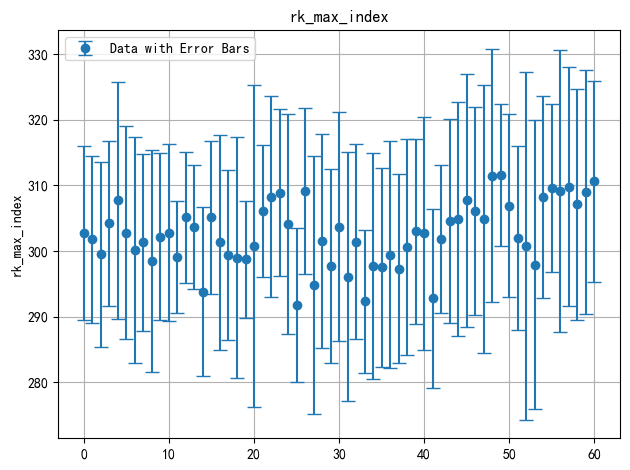

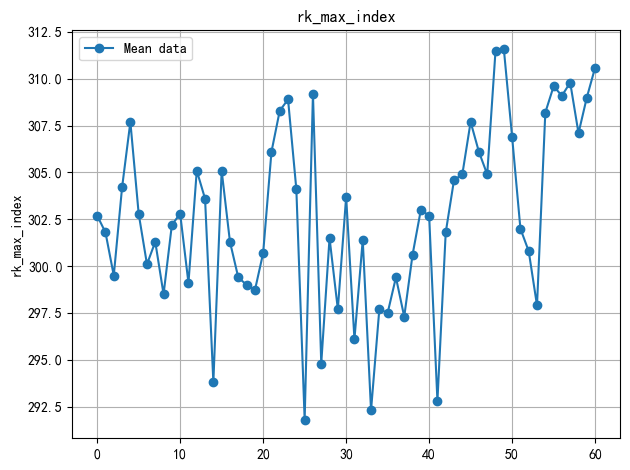

1it [00:00,  2.18it/s]

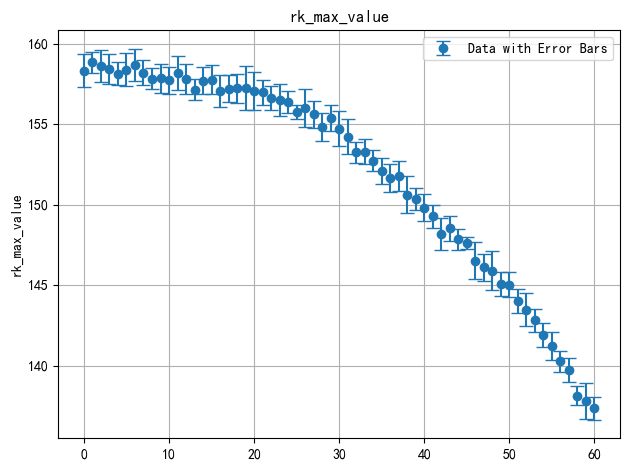

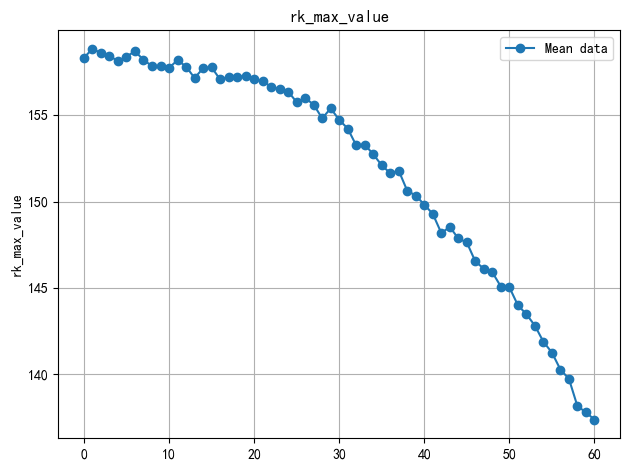

2it [00:00,  2.33it/s]

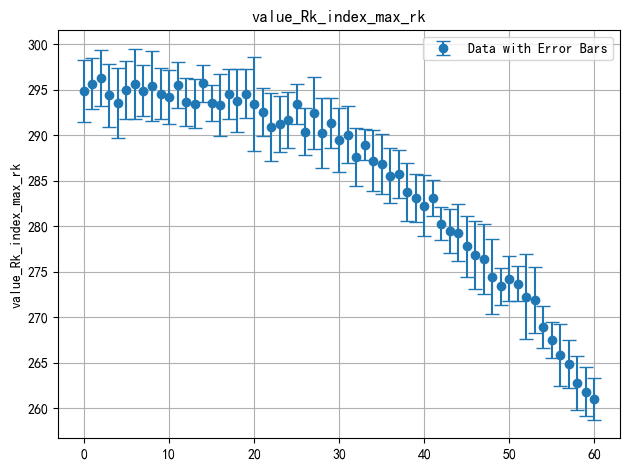

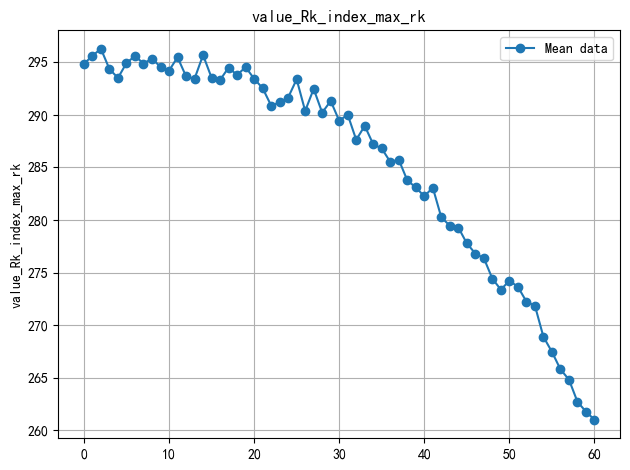

3it [00:01,  2.33it/s]

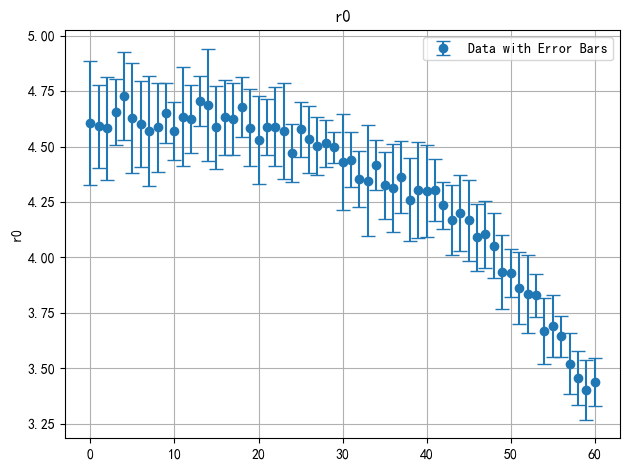

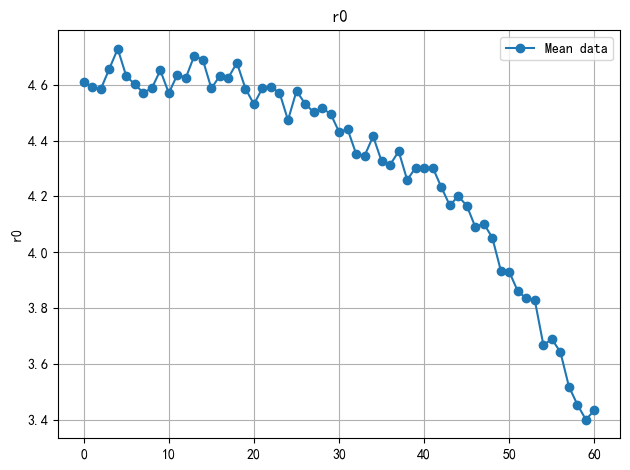

4it [00:01,  2.35it/s]


In [ ]:
columns_to_plot = ["rk_max_index", "rk_max_value", "value_Rk_index_max_rk", "r0"]
for i, ranks in tqdm(enumerate(result_data)):

    scatter_plot_with_error_bars(data=ranks, y_label=columns_to_plot[i], title=f'{columns_to_plot[i]}',img_folder = f'{img_dir}\\bar')
    scatter_plot_mean(x_data=range(len(ranks)), data=ranks, y_label=columns_to_plot[i],img_folder = f'{img_dir}\mean', plot=True,title=f'{columns_to_plot[i]}')